In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('heart.csv')
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [3]:
df["ChestPain"]= df.ChestPain.replace({"typical": 1, "asymptomatic": 2, "nonanginal": 3, "nontypical": 4})
df["Thal"] = df.Thal.replace({"fixed": 1, "normal":2, "reversable":3})
df["AHD"] = df.AHD.replace({"Yes": 1, "No":0})

In [4]:
df = pd.concat([pd.Series(1, index = df.index, name = '00'), df], axis=1)

In [5]:
df

,00,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,1.0,0
1,1,2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,2.0,1
2,1,3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,3.0,1
3,1,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,2.0,0
4,1,5,41,0,4,130,204,0,2,172,0,1.4,1,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,3.0,1
299,1,300,68,1,2,144,193,1,0,141,0,3.4,2,2.0,3.0,1
300,1,301,57,1,2,130,131,0,0,115,1,1.2,2,1.0,3.0,1
301,1,302,57,0,4,130,236,0,2,174,0,0.0,2,1.0,2.0,1


In [6]:
def sigmoid(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z)))

In [7]:
def cost(X, y, theta):
    y1 = sigmoid(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [8]:
def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = sigmoid(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(X, y, theta))
    return J, theta

In [9]:
def predict(X, y, theta, alpha, epochs):
    J, th = gradient_descent(X, y, theta, alpha, epochs) 
    h = sigmoid(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    acc = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, acc

In [10]:
X = df.drop(columns=[ "ChestPain", "Thal"])
y= df["AHD"]

In [11]:
X

,00,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
0,1,1,63,1,145,233,1,2,150,0,2.3,3,0.0,0
1,1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,1
2,1,3,67,1,120,229,0,2,129,1,2.6,2,2.0,1
3,1,4,37,1,130,250,0,0,187,0,3.5,3,0.0,0
4,1,5,41,0,130,204,0,2,172,0,1.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,299,45,1,110,264,0,0,132,0,1.2,2,0.0,1
299,1,300,68,1,144,193,1,0,141,0,3.4,2,2.0,1
300,1,301,57,1,130,131,0,0,115,1,1.2,2,1.0,1
301,1,302,57,0,130,236,0,2,174,0,0.0,2,1.0,1


In [12]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: AHD, Length: 303, dtype: int64

In [13]:
theta = [0.5]*len(X.columns)
J, acc = predict(X, y, theta, 0.0001, 2500)


C:\Users\HAMNAI~1\AppData\Local\Temp/ipykernel_7256/1022679638.py:3: RuntimeWarning: divide by zero encountered in log
  return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [14]:
print(acc* 100 , '%')

81.1881188118812 %


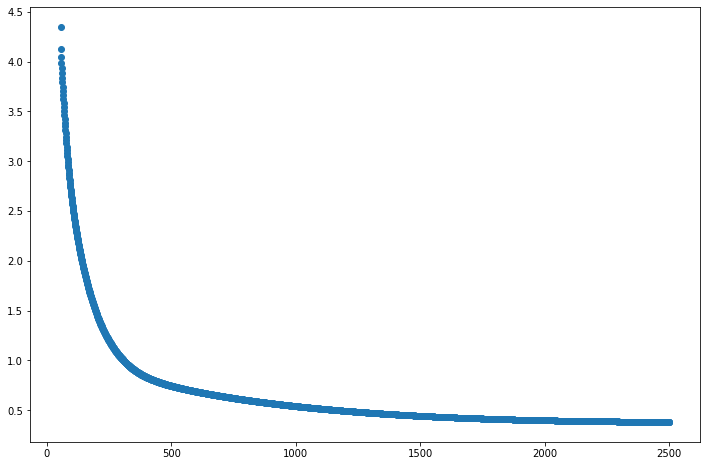

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.show()

In [16]:
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

In [17]:
#task2

In [18]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [19]:
df = pd.read_csv('heart.csv')
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [20]:
df["ChestPain"]= df.ChestPain.replace({"typical": 1, "asymptomatic": 2, "nonanginal": 3, "nontypical": 4})
df["Thal"] = df.Thal.replace({"fixed": 1, "normal":2, "reversable":3})
df["AHD"] = df.AHD.replace({"Yes": 1, "No":0})

In [21]:
df = pd.concat([pd.Series(1, index = df.index, name = '00'), df], axis=1)

In [22]:
df

,00,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,1.0,0
1,1,2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,2.0,1
2,1,3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,3.0,1
3,1,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,2.0,0
4,1,5,41,0,4,130,204,0,2,172,0,1.4,1,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,3.0,1
299,1,300,68,1,2,144,193,1,0,141,0,3.4,2,2.0,3.0,1
300,1,301,57,1,2,130,131,0,0,115,1,1.2,2,1.0,3.0,1
301,1,302,57,0,4,130,236,0,2,174,0,0.0,2,1.0,2.0,1
